# Data science

## Titanic

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline

### Utilitary functions


In [ ]:
def count_bins(arr1, arr2):
    return len(set(arr1)), len(set(arr2))

### Import data from CSV

In [2]:
titanic_data = np.genfromtxt('titanic.dat', delimiter=',', skip_header=1)

classes = titanic_data[:, 0]
ages = titanic_data[:, 1]
sexes = titanic_data[:, 2]
survived = titanic_data[:, 3]

### Class vs Age vs Sex

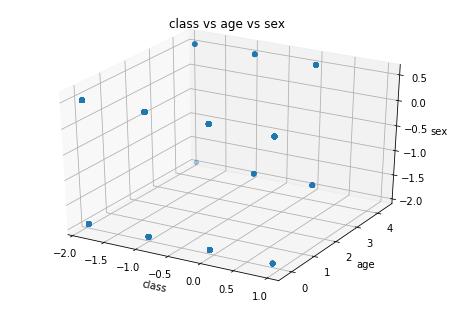

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig_3d = plt.figure()
ax = Axes3D(fig_3d)
ax.set_xlabel('class')
ax.set_ylabel('age')
ax.set_zlabel('sex')
ax.set_title('class vs age vs sex')
_ = ax.scatter(classes, ages, sexes)


### Class vs Age

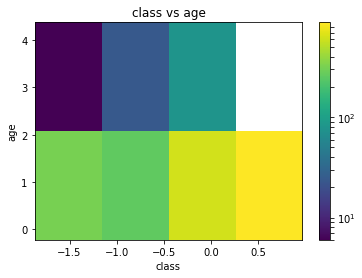

In [4]:
fig_class_age = plt.figure()
plt.xlabel('class')
plt.ylabel('age')
plt.title('class vs age')
_ = plt.hist2d(classes, ages, norm=LogNorm(), bins=count_bins(classes, age))
_ = plt.colorbar()

### Class vs Sex

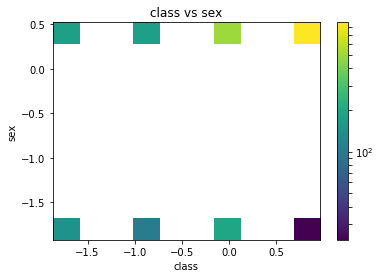

In [5]:
fig_class_sex = plt.figure(3)
plt.xlabel('class')
plt.ylabel('sex')
plt.title('class vs sex')
_ = plt.hist2d(classes, sexes, norm=LogNorm())
_ = plt.colorbar()

### Age vs Sex

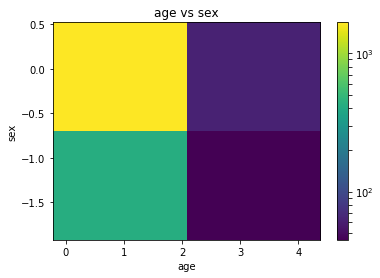

In [6]:


fig_age_sex = plt.figure(4)
plt.xlabel('age')
plt.ylabel('sex')
plt.title('age vs sex')
_ = plt.hist2d(ages, sexes, norm=LogNorm(), bins=count_bins(age, sex))
_ = plt.colorbar()

### Recherche de K optimal

In [7]:
from scipy.spatial import distance
from sklearn.cluster import KMeans

K = list(range(1, 30))
mean_dists = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(titanic_data)
    
    dists = []
    for i, label in enumerate(kmeans.labels_):
        row = titanic_data[i]
        cluster_center = kmeans.cluster_centers_[label]
        dist = distance.euclidean(row, cluster_center)
        dists.append(dist)
    
    mean_dist = np.mean(dists)
    mean_dists.append(mean_dist)

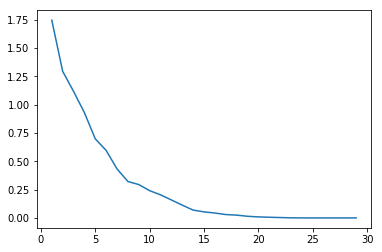

In [8]:
plt.axes().set_yscale('linear')
a = plt.plot(K, mean_dists)

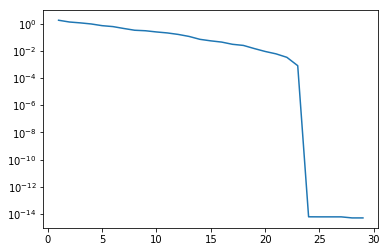

In [9]:
plt.axes().set_yscale('log')
b = plt.plot(K, mean_dists)